<a href="https://colab.research.google.com/github/celinascaglione/m3u4/blob/master/Copia_de_TpCelina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NOMBRE DEL PROYECTO: PREDICCIÓN DE PACIENTES CON ESPECTRO DEL AUTISMO.
## NOMBRE DEL ALUMNO: SCAGLIONE CELINA GABRIELA

## **OBJETIVO DE LA INVESTIGACIÓN: PREDICCIÓN DEL ESPECTRO DEL AUTISMO.**

El trastorno del espectro del autismo, es una enfermedad grave del neurodesarrollo que dura toda la vida, y se caracteriza por discapacidades crónicas o limitadas al desarrollo de las habilidades sociocomunicativas, las capacidades de pensamiento, las actividades y el comportamiento.
En los niños de 2 a 3 años, los signos y síntomas son más evidentes y fáciles de reconocer.
Para la investigación del autismo y su predicción se tomó como fuente de datos: https://ieeexplore.ieee.org/document/8679454
El conjunto de datos se compone de una encuesta realizada a personas que completaron un formulario de una app.
Habiendo etiquetas para saber si la persona recibió ya un diagnóstico de autismo.






## Entonces para poder utilizar los datos que obtuvimos a través de todas las encuentras, comenzamos a introducirnos en este mundo del anális de los datos, a través de la importación de las librerías que necesitamos para poder utilizar los datos numéricos y de texto, y analizarlos, para posteriormente extraer conclusiones valiosas para nuestra investigación, realizando gráficos para un mejor entendimiento.

## IMPORTACIÓN DE LIBRERÍAS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

# IMPORTACIÓN DEL DATASET

In [ ]:
Importamos los datos.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
column_order = ["Case_No", "A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "Age_Mons", "Qchat-10-Score", "Sex", "Ethnicity", "Jaundice", "Family_mem_with_ASD", "Who completed the test", "Class/ASD Traits "]
df = pd.read_csv("/content/drive/MyDrive/autismo.csv", names=column_order, header=0)


In [ ]:
df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


# EXPLORACIÓN DE LOS DATOS.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

Con info podemos dilucidar si los datos a completar en los registros, van a ser numéricos o categóricos como texto. Todos estos datos son fundamentales para poder realizar conclusiones posteriores, al analizarlos. También vemos las cantidad de columnas que compone nuestra tabla y el nombre de cada campo. Así como también la cantidad de personas que han realizado la encuesta.

In [ ]:
df.shape

(1054, 19)

Los datos están cargados en 19 columnas. Conformando 1054 encuestas que hay completado, o sea, 1054 registros.

In [ ]:
df.head(10)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
5,6,1,1,0,0,1,1,1,1,1,1,21,8,m,black,no,no,family member,Yes
6,7,1,0,0,1,1,1,0,0,1,0,33,5,m,asian,yes,no,family member,Yes
7,8,0,1,0,0,1,0,1,1,1,1,33,6,m,asian,yes,no,family member,Yes
8,9,0,0,0,0,0,0,1,0,0,1,36,2,m,asian,no,no,family member,No
9,10,1,1,1,0,1,1,0,1,1,1,22,8,m,south asian,no,no,Health Care Professional,Yes


In [ ]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


En este caso, con describe podemos observar sólo valores numéricos la media (mean) y la mediana 50%,  son iguales, significa que la distribución de los datos es simétrica alrededor de un punto central.
Si la distribución de las respuestas en la encuesta está más o menos equilibrada y no hay valores atípicos o sesgo significativo, es probable que la media y la mediana sean muy similares y caigan cerca del centro de la distribución de las respuestas.

Los valores mínimos (min) y máximos (max) de la cantidad de encuestados, así como también el mínimo (12)y máximo de los meses de edad de los encuestados(36).
La cantidad total de personas que completaron dicha encuesta (count).
El desvío standar (std).


In [ ]:
# Contar la cantidad de casos que tienen "yes" en la columna "Class/ASD Traits"
cantidad_Yes = df['Class/ASD Traits '].value_counts()['Yes']

# Contar la cantidad de casos que tienen "no" en la columna "Class/ASD Traits"
cantidad_No = df['Class/ASD Traits '].value_counts()['No']

print("Cantidad de casos con 'Yes' en la columna 'Class/ASD Traits':", cantidad_Yes)
print("Cantidad de casos con 'No' en la columna 'Class/ASD Traits':", cantidad_No)

Cantidad de casos con 'Yes' en la columna 'Class/ASD Traits': 728
Cantidad de casos con 'No' en la columna 'Class/ASD Traits': 326


In [ ]:
# Crear una subtabla con las filas donde 'Class/ASD Traits' es igual a 'Yes'
subtabla_Yes = df.loc[df['Class/ASD Traits '] == 'Yes']


In [ ]:
subtabla_Yes.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,543.781593,0.730769,0.603022,0.535714,0.681319,0.712912,0.765110,0.829670,0.601648,0.682692,0.645604,28.223901,6.788462
std,291.080202,0.443865,0.489608,0.499066,0.466286,0.452714,0.424222,0.376181,0.489895,0.465748,0.478659,7.491995,1.921937
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,4.000000
25%,302.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,24.000000,5.000000
50%,544.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,7.000000
75%,789.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


La media en este caso que se ha cumplimentado con el score diagnóstico, es de 28 meses.

In [ ]:
# Filtrar las filas donde 'Class/ASD Traits' es igual a 'Yes' y seleccionar la columna 'Age_Mons'
edades_yes = df.loc[df['Class/ASD Traits '] == 'Yes', 'Age_Mons']

# Mostrar las edades
print(edades_yes)

1       36
2       36
3       24
4       20
5       21
        ..
1046    24
1047    30
1050    12
1051    18
1053    24
Name: Age_Mons, Length: 728, dtype: int64


In [ ]:
edades_yes.describe()

count    728.000000
mean      28.223901
std        7.491995
min       12.000000
25%       24.000000
50%       30.000000
75%       36.000000
max       36.000000
Name: Age_Mons, dtype: float64

# PREPARACIÓN Y TRANSFORMACIÓN DEL DATASET

### Detección y manejo de datos faltantes

Identifico valores faltantes por columnas.

In [ ]:
# Seleccionar las columnas no numéricas
non_numeric_cols = df.select_dtypes(exclude='number').columns

# Mostrar información de las columnas no numéricas
print(df[non_numeric_cols].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Sex                     1054 non-null   object
 1   Ethnicity               1054 non-null   object
 2   Jaundice                1054 non-null   object
 3   Family_mem_with_ASD     1054 non-null   object
 4   Who completed the test  1054 non-null   object
 5   Class/ASD Traits        1054 non-null   object
dtypes: object(6)
memory usage: 49.5+ KB
None


In [ ]:
df[non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Sex                     1054 non-null   object
 1   Ethnicity               1054 non-null   object
 2   Jaundice                1054 non-null   object
 3   Family_mem_with_ASD     1054 non-null   object
 4   Who completed the test  1054 non-null   object
 5   Class/ASD Traits        1054 non-null   object
dtypes: object(6)
memory usage: 49.5+ KB


In [ ]:
print(df.isna().sum())


Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64


Cantidad de columnas totales: 19, cantidad de filas no nulas: 1054. No existen valores no nulos. Con lo cual no necesitaría limpiar los valores nulos. Pero sí me interesan los casos afirmativos del score diagnóstico.

## Detección y manejo de valores atípicos

In [ ]:
df.kurt(numeric_only=True)[:11]

Case_No   -1.200000
A1        -1.937778
A2        -1.961160
A3        -1.840944
A4        -2.001359
A5        -1.994000
A6        -1.906564
A7        -1.606871
A8        -1.976870
A9        -2.002054
A10       -1.880288
dtype: float64

La curtosis es una medida estadística que describe la forma de la distribución de los datos alrededor de la media. Se calcula comparando la distribución de los datos con una distribución normal estándar.
Si la curtosis es menor que cero, la distribución es más aplanada (también llamada platicúrtica). Esto significa que hay menos frecuencia de valores extremos y las colas de la distribución son más ligeras en comparación con una distribución normal estándar. En otras palabras, hay menos valores alejados de la media en comparación con una distribución normal.
Con lo cual, los valores atípicos no serían un inconveniente en este caso.

In [ ]:
df['A1'].describe()

count    1054.000000
mean        0.563567
std         0.496178
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: A1, dtype: float64

En este caso, el valor máximo no sería un valor atípico.

<Axes: >

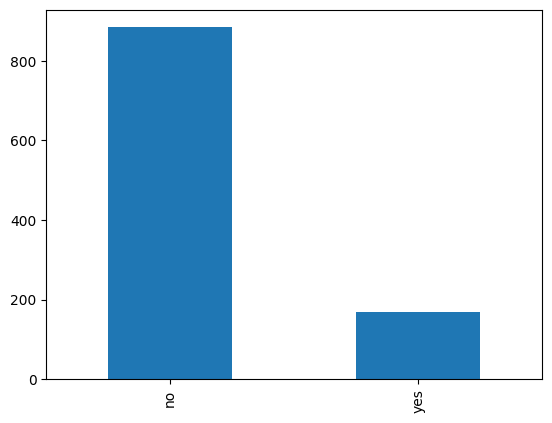

In [ ]:
df['Family_mem_with_ASD'].value_counts().plot(kind='bar')

## Detección y manejo de valores innecesarios

Una columna puede tener muchas observaciones con el mismo valor. Cuando un porcentaje extremadamente alto de la columna tiene un valor repetitivo, debemos investigar si dicha columna proporciona información valiosa.

¿Cómo saberlo? Podemos generar una lista de columnas con un alto porcentaje del mismo valor. Por ejemplo, especificamos a continuación mostrar columnas con más del 99,9% de filas con el mismo valor.

In [ ]:
num_rows = len(df)

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.999:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

No existe tal columna en nuestro conjunto de datos de ejemplo.

## Detección y manejo de valores inconsistentes

In [ ]:
print(df.columns)


Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')


In [ ]:
df['Class/ASD Traits '].value_counts(dropna=False)


Yes    728
No     326
Name: Class/ASD Traits , dtype: int64

## Visualización de los datos.
Utilizamos gráfico de tortas.

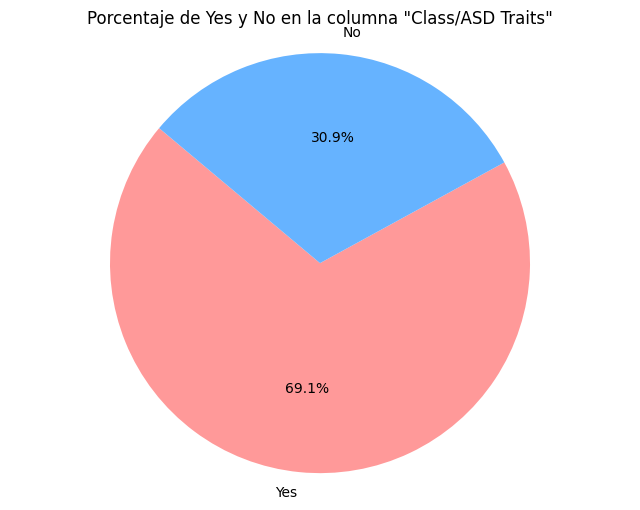

In [ ]:

# Calcular el porcentaje de 'yes' y 'no'
porcentaje_Yes = (df['Class/ASD Traits '] == 'Yes').mean() * 100
porcentaje_No = (df['Class/ASD Traits '] == 'No').mean() * 100

# Etiquetas y valores para el gráfico de torta
labels = ['Yes', 'No']
sizes = [porcentaje_Yes, porcentaje_No]

# Colores para los sectores del gráfico
colors = ['#ff9999','#66b3ff']

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Yes y No en la columna "Class/ASD Traits"')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Este gráfico muestra la proporción de Yes, o sea quiénes cumplirían con el score diagnóstico, y de los No, que no cumplen con la puntuación diagnóstica, que se expresa en los registros por debajo de la columna Class/ASD Traits, de los niños, que padecerían algún grado del espectro del autismo,  representa en relación al total.
Ahora veríamos la relación de los Yes con la edad.
El siguiente código creará un gráfico de histograma que muestra la distribución de las edades para los registros que tienen "Yes" en la columna "Class/ASD Traits".

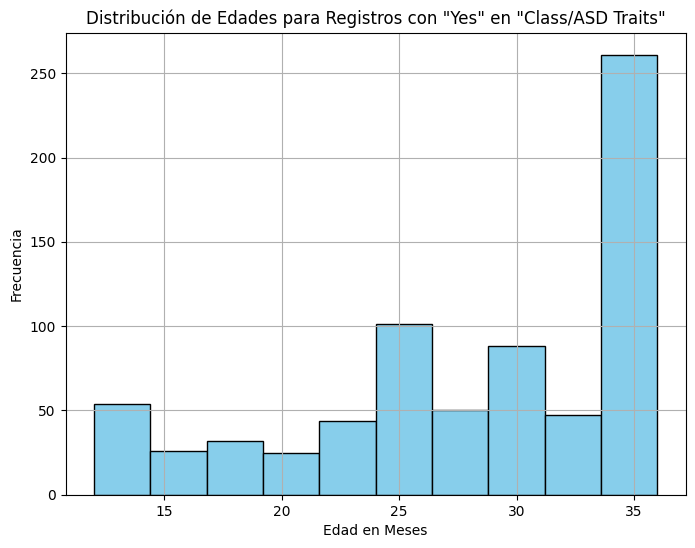

In [ ]:
# Filtrar el DataFrame para incluir solo los registros con 'Yes' en la columna 'Class/ASD Traits'
df_yes = df[df['Class/ASD Traits '] == 'Yes']

# Obtener la edad de los registros filtrados
edades_yes = df_yes['Age_Mons']

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.hist(edades_yes, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de Edades para Registros con "Yes" en "Class/ASD Traits"')
plt.xlabel('Edad en Meses')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

De esta manera, se puede visualizar que la mayor cantidad de niños con espectro autista son diagnosticados alrededor de los 3 años. Y que además la mayor cantidad de diagnósticos se da entre los 2 y los 3 años, que es cuando más evidentes se hacen los signos y síntomas.

En esta visualización, nos encargamos de diferenciar los casos diagnosticados y la relación con el sexo masculino de la muestra estudiada.

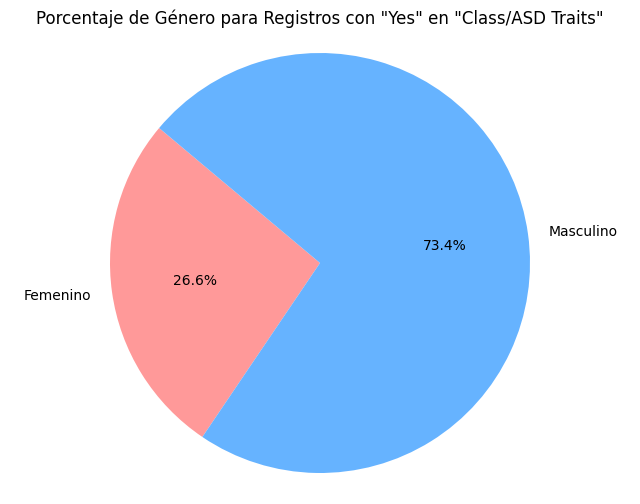

In [ ]:

# Filtrar el DataFrame para incluir solo los registros con 'Yes' en la columna 'Class/ASD Traits'
df_yes = df[df['Class/ASD Traits '] == 'Yes']

# Calcular el porcentaje de género para los registros filtrados
porcentaje_f = (df_yes['Sex'] == 'f').mean() * 100
porcentaje_m = (df_yes['Sex'] == 'm').mean() * 100

# Etiquetas y valores para el gráfico de torta
labels = ['Femenino', 'Masculino']
sizes = [porcentaje_f, porcentaje_m]

# Colores para los sectores del gráfico
colors = ['#ff9999', '#66b3ff']

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Género para Registros con "Yes" en "Class/ASD Traits"')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


De esta manera podemos visualizar que en los varones existe una prevalencia mayor de autismo que en las mujeres.

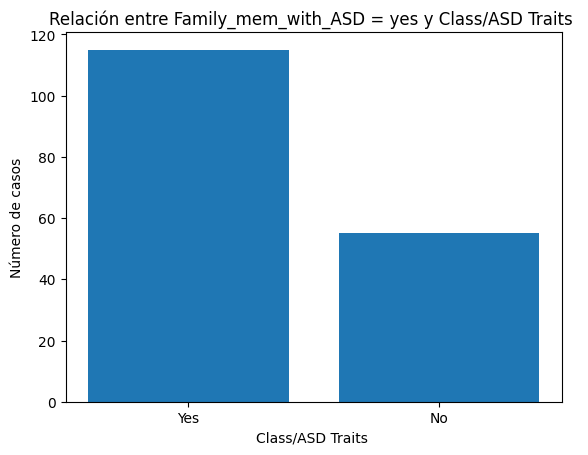

In [ ]:

# Contar la cantidad de casos en cada categoría de 'Family_mem_with_ASD' para los que 'Class/ASD Traits ' es también 'Yes'
family_asd_counts = df[df['Family_mem_with_ASD'] == 'yes']['Class/ASD Traits '].value_counts()

# Crear el gráfico de barras
plt.bar(family_asd_counts.index, family_asd_counts.values)

# Agregar etiquetas y título
plt.xlabel('Class/ASD Traits ')
plt.ylabel('Número de casos')
plt.title('Relación entre Family_mem_with_ASD = yes y Class/ASD Traits ')

# Mostrar el gráfico
plt.show()




En el eje x del gráfico, tenemos las diferentes categorías de la variable 'Class/ASD Traits'. En este caso, probablemente tendríamos dos categorías: 'Yes' (sí tiene trastorno del espectro autista) y 'No' (no tiene trastorno del espectro autista).

En el eje y, tenemos el número de casos en cada categoría. Específicamente, este gráfico muestra el número de casos en los que 'Family_mem_with_ASD' es 'yes' para cada categoría de 'Class/ASD Traits'. En otras palabras, muestra cuántos individuos tienen un miembro de la familia con antecedentes de trastorno del espectro autista, dividido en aquellos que tienen el trastorno ('Yes') y aquellos que no lo tienen ('No').

Este gráfico puede proporcionar información sobre la existencia de más casos con diagnóstico probable del espectro autista que tienen familiares con antecedentes de la misma patología.  






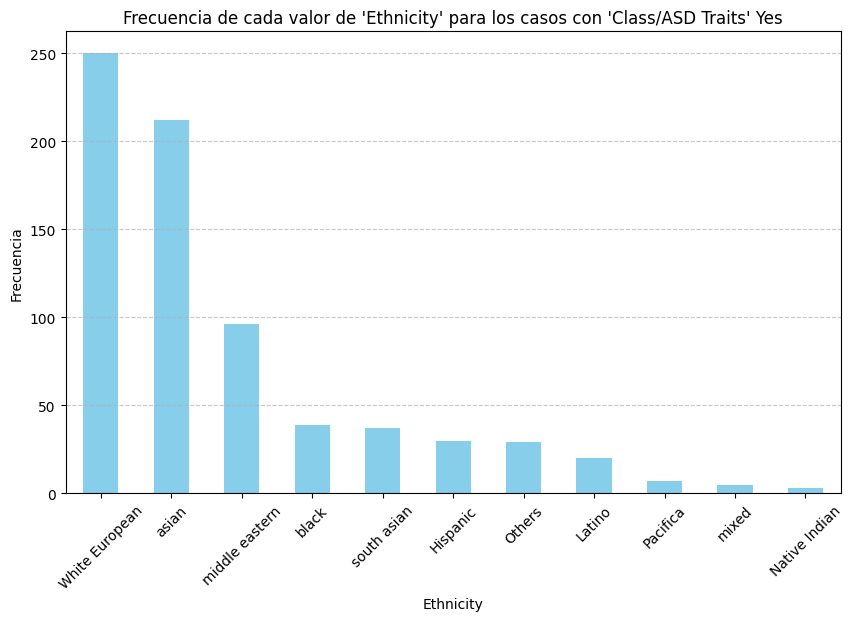

In [ ]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame para incluir solo los casos donde 'Class/ASD Traits' es 'Yes'
df_yes = df[df['Class/ASD Traits '] == 'Yes']

# Contar la frecuencia de cada valor de 'Ethnicity' en el subconjunto de datos
ethnicity_counts = df_yes['Ethnicity'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ethnicity_counts.plot(kind='bar', color='skyblue')
plt.title("Frecuencia de cada valor de 'Ethnicity' para los casos con 'Class/ASD Traits' Yes")
plt.xlabel("Ethnicity")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


# PROCESO DE MODELADO

Transformación de las variables categóricas.

In [ ]:
# Realiza la codificación one-hot para todas las variables categóricas, incluyendo 'Family_mem_with_ASD'
df_encoded = pd.get_dummies(df, columns=['Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Class/ASD Traits '])

# Elimina la columna 'Class/ASD Traits _No' para evitar la colinealidad con 'Class/ASD Traits _Yes' en la variable objetivo
df_encoded.drop('Class/ASD Traits _No', axis=1, inplace=True)

# Elimina las filas que contienen 'family member' en la columna 'Family_mem_with_ASD'
df_encoded = df_encoded[df_encoded['Family_mem_with_ASD_family member'] != 1]

# Selecciona todas las columnas excepto la variable objetivo como características predictoras
X = df_encoded.drop(['Class/ASD Traits _Yes'], axis=1)

# Selecciona la columna 'Class/ASD Traits _Yes' como la variable objetivo
y = df_encoded['Class/ASD Traits _Yes']

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de clasificación (por ejemplo, RandomForestClassifier)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


KeyError: 'Family_mem_with_ASD_family member'


En resumen, la elección entre Aprendizaje Supervisado y No Supervisado depende de tus objetivos específicos, la disponibilidad de etiquetas en tus datos y el tipo de análisis que deseas realizar. En mi caso, la variable objetivo definida es Class/ASD Traits, la cual nos permite predecir o clasificar,a los pacientes con Síndrome del Espectro del Autismo. Por eso el Aprendizaje Supervisado es apropiado. El Aprendizaje no supervisado, no sería el elegido, ya que, necesito explorar la estructura de tus datos con la necesidad de etiquetas o realizar análisis con una guía. En cambio, si nada de ésto fuera necesario, el Aprendizaje No Supervisado sería más adecuado.

# HALLAZGOS FINALES Y PASOS POR SEGUIR.

Como conclusión final, teniendo en cuenta las variables que nos propone nuestro dataset, y al estar investigando la detección del Sindrome del Espectro Autista, estas variables elegidas están relacionadas con signos y síntomas, o pruebas médicas, que son necesarias para la alta probabilidad de que ese niño sea diagnosticado con esta patología. Estas variables son fundamentales para el objetivo de la investigación.

El score que se obtiene por la presencia de estas variables, hace que se cumplimente con el valor de puntuación necesario para poder indicar el diagnóstico.
Hay ciertos patrones y tendencias que se observa en variables que también encontramos en nuestro dataset elegido, que nos permite inferir que hay una mayor prevalencia de la patología en los varones. También que la mayor probabilidad de diagnosticarlo es en la edad entre los 2 y 3 años(24 a 36meses) de edad de los niños.

Otra tendencia que se observa es que la mayor incidencia de casos clasificados como positivos de Autismo, están relacionados con la etnia blanca europea y luego le sigue en frecuencia la raza asiática.

Si bien no hallé sesgos en los valores o errores en los datos cargados, podríamos indicar una investigación aún más amplia, con una muestra mayor de datos, y como hemos visto, el uso de variables extras a las variables que conformaban el score, ayudaron a comprender que hay ciertas tendencias que se presentan, y que nos pueden ayudar a comprender mejor el contexto de esta patología, para poder así realizar una pesquiza más efectiva de probables casos positivos.
Relacionado a esto último, sería beneficioso explorar la posibilidad de incluir variables adicionales en futuros análisis, como antecedentes familiares de trastornos neuropsiquiátricos, historial médico prenatal y postnatal, y factores ambientales, para obtener una comprensión más completa y precisa de los factores de riesgo asociados con el SEA. Asimismo, sería útil considerar el desarrollo de modelos predictivos avanzados utilizando técnicas de aprendizaje automático, que podrían ayudar a identificar patrones sutiles en los datos y mejorar la precisión en la detección temprana del SEA. No sólo los modelos de aprendizaje supervisados, sino justamente los no supervisados, cuyas características, quizás colaboren en la detrección de esos patrones sutiles que no pueden ser detectados por los supervisados.
De esta manera se podrá realizar una pesquiza de uan mayor cantidad de pacientes que no hay sido diagnosticados aún, o que han sido diagnosticado erróneamente con otra patología.
